**Old notebook for reference**: https://colab.research.google.com/drive/1HUhU5jtiIT7FJZNSpG-ByRsC7r3wMgZv#scrollTo=hDcXNR2A8_Zj

Data Source: https://www.bgc-jena.mpg.de/wetter/

# Testing In Notebook

First run tests in a notebook format

## Data Preprocessing

Import data, process data, summarize data

Data URL format: https://www.bgc-jena.mpg.de/wetter/mpi_roof_[year][a,b].zip

In [32]:
import requests
import zipfile
import os

# Get 5 years of data
years = range(2019, 2024)
versions = ['a', 'b']

year_list = [f"{year}{version}" for year in years for version in versions]
BASE_URL = 'https://www.bgc-jena.mpg.de/wetter/mpi_roof_'

# Download all the data
for y in year_list:
    # Download the file
    response = requests.get(f'{BASE_URL}{y}.zip')
    with open('data.zip', 'wb') as f:
        f.write(response.content)

    # Extract the zip file
    with zipfile.ZipFile('data.zip', 'r') as zip_ref:
        zip_ref.extractall()

    # Remove the original zip file
    os.remove('data.zip')

    print(f'Downloaded {y}')


Downloaded 2019a
Downloaded 2019b
Downloaded 2020a
Downloaded 2020b
Downloaded 2021a
Downloaded 2021b
Downloaded 2022a
Downloaded 2022b
Downloaded 2023a
Downloaded 2023b


**Data Format** (for most of the rows)

Table from https://keras.io/examples/timeseries/timeseries_weather_forecasting/

| Index | Features | Format | Description |
|---|---|---|---|
| 1 | Date Time | 01.01.2009 | Date-time reference |
| 2 | p (mbar) | 996.52 | The pascal Si derived unit of pressure used to quantify internal pressure. Meteorological reports typically state atmospheric pressure in millibars. |
| 3 | T (degC) | -8.02 | Temperature in Celsius |
| 4 | Tpot (K) | 265.4 | Temperature in Kelvin |
| 5 | Tdew (degC) | -8.9 | Dew point temperature. The temperature at which air, at constant pressure, becomes saturated with water vapor. |
| 6 | rh (%) | 93.3 | Relative Humidity is a measure of how saturated the air is with water vapor, the %RH determines the amount of water contained within collection objects. |
| 7 | VPmax (mbar) | 3.33 | Saturation vapor pressure |
| 8 | VPact (mbar) | 3.11 | Vapor pressure |
| 9 | VPdef (mbar) | 0.22 | Vapor pressure deficit |
| 10 | sh (g/kg) | 1.94 | Specific humidity |
| 11 | H2OC (mmol/mol) | 3.12 | Water vapor concentration |
| 12 | rho (g/m³)| 1307.75 | Air density |
| 13 | wv (m/s) | 1.03 | Wind speed |
| 14 | max. wv (m/s) | 1.75 | Maximum wind speed |
| 15 | wd (deg) | 152.3 | Wind direction in degrees |



In [33]:
import pandas as pd

# Concat all dataframes
dfs = []
for y in year_list:
    dfs.append(pd.read_csv(f'mpi_roof_{y}.csv', encoding="ISO-8859-1"))
df = pd.concat(dfs, ignore_index=True)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2019 00:10:00,1003.45,6.94,279.82,5.54,90.80,9.98,9.07,0.92,5.64,...,1.92,2.60,243.9,0.0,0.0,0.0,0.0,0.0,18.45,421.6
1,01.01.2019 00:20:00,1003.23,6.94,279.84,5.50,90.50,9.99,9.04,0.95,5.62,...,1.60,2.72,237.1,0.0,0.0,0.0,0.0,0.0,18.40,420.6
2,01.01.2019 00:30:00,1003.14,6.98,279.89,5.47,90.10,10.01,9.02,0.99,5.61,...,1.53,2.68,240.9,0.0,0.0,0.0,0.0,0.0,18.35,420.0
3,01.01.2019 00:40:00,1003.02,6.99,279.91,5.42,89.70,10.02,8.99,1.03,5.59,...,1.27,2.48,233.6,0.0,0.0,0.0,0.0,0.0,18.29,419.8
4,01.01.2019 00:50:00,1002.87,7.00,279.93,5.33,89.10,10.03,8.93,1.09,5.56,...,1.29,2.46,216.3,0.0,0.0,0.0,0.0,0.0,18.25,419.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262996,31.12.2023 23:20:00,979.49,7.64,282.45,3.08,72.77,10.47,7.62,2.85,4.85,...,4.40,5.50,214.7,0.0,0.0,0.0,0.0,0.0,15.30,427.5
262997,31.12.2023 23:30:00,979.51,7.59,282.41,3.06,72.94,10.44,7.62,2.83,4.85,...,4.90,7.17,214.3,0.0,0.0,0.0,0.0,0.0,15.31,427.9
262998,31.12.2023 23:40:00,979.63,7.69,282.50,3.04,72.31,10.52,7.60,2.91,4.84,...,4.73,7.03,205.9,0.0,0.0,0.0,0.0,0.0,15.31,427.8
262999,31.12.2023 23:50:00,979.59,7.61,282.42,3.05,72.75,10.45,7.61,2.85,4.84,...,3.65,5.51,211.1,0.0,0.0,0.0,0.0,0.0,15.31,428.5


In [34]:
# Columns: "Date Time","p (mbar)","T (degC)","Tpot (K)","Tdew (degC)","rh (%)","VPmax (mbar)","VPact (mbar)",
#           "VPdef (mbar)","sh (g/kg)","H2OC (mmol/mol)","rho (g/m**3)","wv (m/s)","max. wv (m/s)","wd (deg)",
#           "rain (mm)","raining (s)","SWDR (W/m²)","PAR (µmol/m²/s)","max. PAR (µmol/m²/s)","Tlog (degC)","CO2 (ppm)"
df.describe()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
count,263001.000000,263001.000000,263001.000000,263001.000000,263001.000000,263001.000000,263001.000000,263001.000000,263001.000000,263001.000000,...,263001.000000,263001.000000,263001.000000,263001.000000,263001.000000,263001.000000,263001.000000,263001.000000,263001.000000,263001.000000
mean,989.713344,10.639363,284.638495,5.863809,75.556197,14.513231,10.030444,4.482717,6.335678,10.140052,...,2.118916,3.602300,176.946086,0.009813,32.388812,129.580141,252.054663,303.762705,21.152688,398.404509
std,9.215470,7.971522,8.080411,6.206958,18.949020,8.045162,4.196911,5.671413,2.667255,4.250963,...,19.565006,2.428329,83.569715,0.123659,124.055099,215.153140,412.771560,531.272722,8.314478,572.448204
min,952.510000,-19.960000,254.570000,-21.170000,14.230000,1.240000,1.120000,0.000000,0.710000,1.140000,...,-9999.000000,0.000000,0.000000,0.000000,0.000000,-9999.000000,0.000000,-9999.000000,-6.140000,-9999.000000
25%,984.320000,4.430000,278.340000,1.110000,62.720000,8.390000,6.620000,0.820000,4.180000,6.700000,...,1.010000,1.800000,134.300000,0.000000,0.000000,0.000000,0.000000,0.000000,14.660000,417.140000
50%,990.350000,10.140000,284.320000,5.900000,79.000000,12.410000,9.300000,2.330000,5.870000,9.400000,...,1.760000,2.990000,198.700000,0.000000,0.000000,3.120000,9.310000,12.520000,20.070000,426.300000
75%,995.610000,16.370000,290.390000,10.700000,91.200000,18.650000,12.880000,5.900000,8.140000,13.030000,...,2.850000,4.790000,231.600000,0.000000,0.000000,177.090000,349.360000,415.060000,26.830000,438.800000
max,1020.070000,37.950000,312.210000,22.250000,100.000000,66.130000,26.880000,56.720000,17.130000,27.260000,...,14.230000,22.900000,360.000000,19.200000,600.000000,1126.590000,2185.170000,2500.000000,49.090000,546.200000


### Correlation Discovery

We find the correlation with other columns and our main prediction column, T (deg C). This is quite insightful as we can see columns that can help our predictions greatly.

In [35]:
# Get only the floating point numbers from the table
dff = df.loc[:, df.columns != 'Date Time']

# Extract the columns that look the most useful
corr_mat = dff.corr()
target = corr_mat['T (degC)'].drop('T (degC)')
sorted_corr = target.abs().sort_values(ascending=False)
for col_label, correlation_value in sorted_corr.items():
    print(f"Column: {col_label}, Correlation: {correlation_value}")

Column: Tpot (K), Correlation: 0.99570745904994
Column: Tlog (degC), Correlation: 0.9774599168887204
Column: VPmax (mbar), Correlation: 0.9610091323707131
Column: rho (g/m**3), Correlation: 0.9510897177905429
Column: Tdew (degC), Correlation: 0.8239077954828616
Column: VPact (mbar), Correlation: 0.8022935558449872
Column: H2OC (mmol/mol), Correlation: 0.8015619417624299
Column: sh (g/kg), Correlation: 0.8011715337780086
Column: VPdef (mbar), Correlation: 0.7695248633087297
Column: rh (%), Correlation: 0.5849969513274151
Column: PAR (µmol/m²/s), Correlation: 0.472126454413622
Column: SWDR (W/m²), Correlation: 0.4591117772891701
Column: max. PAR (µmol/m²/s), Correlation: 0.4353262850629407
Column: max. wv (m/s), Correlation: 0.11889334102190578
Column: raining (s), Correlation: 0.10790655742057835
Column: p (mbar), Correlation: 0.07178334941392706
Column: wd (deg), Correlation: 0.040054995539300434
Column: CO2 (ppm), Correlation: 0.024596290708999245
Column: wv (m/s), Correlation: 0.0091

We have identified that the most correlated data points (ignoring ones directly measuring or derived from temperature) are:

* VPmax (mbar) - Saturation Vapor Pressure
* rho (g/m**3) - Air density
* VPdef (mbar) - Vapor Pressure deficit
* H2OC (mmol/mol) - Water vapor concentration
* VPact (mbar) - Vapor Pressure
* sh (g/kg) - Specific humidity

Thus these, along with the temperature column (duh) we will keep.

### Downsampling

We don't really care about the stuff that happens in an hour, so we will downsample from every 10 mins to every 60 mins (essentially take every 6th row)

In [36]:
df_cut = df[['T (degC)', 'VPmax (mbar)', 'rho (g/m**3)', 'VPdef (mbar)', 'H2OC (mmol/mol)', 'VPact (mbar)', 'sh (g/kg)']]
df_cut = df_cut[::6].reset_index(drop=True)
df_cut

,T (degC),VPmax (mbar),rho (g/m**3),VPdef (mbar),H2OC (mmol/mol),VPact (mbar),sh (g/kg)
0,6.94,9.98,1243.74,0.92,9.04,9.07,5.64
1,6.98,10.01,1242.70,1.21,8.78,8.80,5.48
2,6.92,9.97,1242.16,1.56,8.40,8.41,5.24
3,7.07,10.08,1240.70,1.88,8.18,8.19,5.11
4,7.03,10.05,1239.77,2.12,7.93,7.93,4.95
...,...,...,...,...,...,...,...
43829,7.48,10.36,1211.13,2.29,8.25,8.07,5.15
43830,7.22,10.18,1212.86,2.29,8.06,7.89,5.03
43831,7.30,10.24,1212.88,2.58,7.82,7.66,4.88
43832,7.36,10.28,1213.05,2.69,7.74,7.59,4.83


In [37]:
df_cut.describe()

,T (degC),VPmax (mbar),rho (g/m**3),VPdef (mbar),H2OC (mmol/mol),VPact (mbar),sh (g/kg)
count,43834.000000,43834.000000,43834.000000,43834.000000,43834.000000,43834.000000,43834.000000
mean,10.638007,14.511475,1211.262981,4.480070,10.140928,10.031324,6.336245
std,7.970420,8.043691,38.125827,5.670264,4.252176,4.198096,2.667993
min,-19.930000,1.250000,1100.460000,0.000000,1.160000,1.140000,0.720000
25%,4.430000,8.380000,1183.362500,0.820000,6.700000,6.620000,4.180000
50%,10.130000,12.400000,1209.880000,2.330000,9.410000,9.300000,5.870000
75%,16.370000,18.650000,1239.017500,5.890000,13.030000,12.880000,8.140000
max,37.940000,66.090000,1372.300000,56.480000,27.070000,26.690000,17.010000


### Normalize the data

We will perform Z-score normalization, which is just $\frac{x - \mu}{\sigma}$ for each value of a given attribute.

In [38]:
df_normalized = (df_cut - df_cut.mean()) / df_cut.std()
df_normalized.describe()

,T (degC),VPmax (mbar),rho (g/m**3),VPdef (mbar),H2OC (mmol/mol),VPact (mbar),sh (g/kg)
count,4.383400e+04,4.383400e+04,4.383400e+04,4.383400e+04,4.383400e+04,4.383400e+04,4.383400e+04
mean,-2.852934e-17,2.775127e-16,4.079696e-15,-4.149723e-17,2.489834e-16,-8.299445e-17,-3.267907e-16
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.835181e+00,-1.648680e+00,-2.906245e+00,-7.900989e-01,-2.112078e+00,-2.117942e+00,-2.105045e+00
25%,-7.788808e-01,-7.622714e-01,-7.318000e-01,-6.454849e-01,-8.092157e-01,-8.125883e-01,-8.081898e-01
50%,-6.373654e-02,-2.625008e-01,-3.627413e-02,-3.791833e-01,-1.718949e-01,-1.742036e-01,-1.747549e-01
75%,7.191582e-01,5.145057e-01,7.279716e-01,2.486534e-01,6.794339e-01,6.785639e-01,6.760718e-01
max,3.425414e+00,6.412296e+00,4.223830e+00,9.170636e+00,3.981273e+00,3.968150e+00,4.000668e+00


### Split Data into sets

We are splitting the data into train/validation/test sets. The split will be 70%, 20%, and 10% respectively.

In [39]:
import math

size = len(df_normalized)
train = df_normalized[:math.floor(size*0.7)]
validation = df_normalized[math.floor(size*0.7):math.floor(size*0.9)]
test = df_normalized[math.floor(size*0.9):]

len(train), len(validation), len(test)

(30683, 8767, 4384)

### Extract input and output data

We will extract the data from the dataframe into numpy arrays for easier calculation.

In [40]:
import numpy as np
import numpy.typing as npt

def get_xy(df: pd.DataFrame) -> tuple[npt.NDArray[np.float64], npt.NDArray[np.float64]]:
    X = df.to_numpy()
    y = df.iloc[:, df.columns == 'T (degC)'].to_numpy().flatten()
    return X, y

X_train, y_train = get_xy(train)
X_validation, y_validation = get_xy(validation)
X_test, y_test = get_xy(test)

## Model Preperation

Prepare data for feeding into LSTM, create required data structures for running LSTM model, and set up initial weights for the model

### Data slicing

Staying with the data for a moment, let's create slices of data for training, validating, and testing. Each "slice" will consist of 2 parts: past and future. The "past" size will eventually be used as a hyperparameter, but the future will remain the same as just 1.

We set the size of the "past" to 24, meaning the past day (24 hours) will determine the next hour's temperature! That means our slice size is 25. Note this means a few things:

- From a set of n items, we will get n - 25 - 1 training examples
- We are feeding 25 days into the model and getting the last day out.

See the following diagram for the window size and prediction impact:

![image of LSTM window predicting the next timestamp](https://raw.githubusercontent.com/tensorflow/docs/master/site/en/tutorials/structured_data/images/lstm_1_window.png)

Note that we are **offsetting the input** by 1 from the output!

In [50]:
import numpy as np

past_size = 24

# Define as the number of input dimensions
in_dims = len(train.columns)

# Slices the input data into n time slices
def form_slices(X: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> tuple[npt.NDArray[np.float64], npt.NDArray[np.float64]]:
    n = len(X)
    X_sliced = np.full((n - past_size, past_size, in_dims), 0.0)
    y_sliced = np.full((n - past_size, past_size), 0.0)
    for i in range(0, n - past_size):
        X_sliced[i] = X[i:i+past_size]
        y_sliced[i] = y[i+1:i+past_size+1]  # Offset by 1 from the input
    return X_sliced, y_sliced

# Slice all 3 sets of data
X_train_sliced, y_train_sliced = form_slices(X_train, y_train)
X_validation_sliced, y_validation_sliced = form_slices(X_validation, y_validation)
X_test_sliced, y_test_sliced = form_slices(X_test, y_test)

### Data structure setup

Set up the required data structures required for the LSTM + Dense layers

In [86]:
import math

# Define the activation functions
sigmoid = lambda x : 1 / (1 + math.e**(-x))
tanh = lambda x : (math.e**(x) - math.e**(-x)) / (math.e**(x) + math.e**(-x))

# Derivatives of the activation functions
d_sigmoid = lambda x : x * (1 - x)
d_tanh = lambda x : 1 - x**2

# Vectorize the activation functions
sigmoid_vec = np.vectorize(sigmoid)
tanh_vec = np.vectorize(tanh)

In [91]:
# Set up the matrix to store internal node calculations
# Rows: f = 0, i = 1, a = 2, o = 3, c = 4, h = 5 (fiaoch)
# Columns: Each time slice to take
# Z-axis: Each input attribute
out = np.full((6, past_size, in_dims), 0.)

# Rows: f = 0, i = 1, a = 2, o = 3 (fiao)
# Columns: # W = 0, U = 1, b = 2 (WUb)
# Z-axis: Each input attribute
weights = np.full((4, 3, in_dims), 0.)

# Dense layer weights - 1D array, size of input dimensions
# Bias is just a single number for the output node bias
d_weights = np.full((in_dims), 0.)
d_bias = 0.0

# Output of the entire network - literally just a single number
pred = 0.0

# Learning rate - SET LOWER
learn_rate = 0.01

### Initialize Weights

Use Normal Xavier Initialization: https://365datascience.com/tutorials/machine-learning-tutorials/what-is-xavier-initialization/

In [92]:
# Initialize weights to random numbers using Normal Xavier Initialization
limit = np.sqrt(6 / (in_dims + past_size))  # Xavier initialization limit
weights = np.random.uniform(-limit, limit, size=(4, 3, in_dims))  # LSTM gate weights
d_weights = np.random.uniform(-limit, limit, size=in_dims)  # Dense layer weights
d_bias = np.random.uniform(-limit, limit)  # Dense layer bias

weights, d_weights, d_bias

(array([[[-0.27813843,  0.19929942, -0.3544491 ,  0.20369724,
          -0.18434855,  0.08328075, -0.02232587],
         [ 0.21611663,  0.22822763,  0.24584542, -0.12316376,
          -0.06350684,  0.03444875,  0.26826753],
         [ 0.04006415, -0.20984891, -0.26262963, -0.24013244,
          -0.02337759, -0.02802541,  0.2928069 ]],
 
        [[-0.38834121, -0.36109534,  0.11419088, -0.39309314,
          -0.02044794, -0.09912991, -0.01900358],
         [-0.00269746, -0.43683065,  0.37781149, -0.32853386,
           0.35140212,  0.0933006 ,  0.10639912],
         [ 0.21868342,  0.03770357,  0.28832277,  0.1366621 ,
          -0.14401661,  0.21385079,  0.38716599]],
 
        [[ 0.38275864, -0.00787237,  0.42078508,  0.06377347,
           0.1169901 ,  0.03094665, -0.15209929],
         [-0.0042657 , -0.02342977, -0.27931525, -0.13366937,
           0.24055073, -0.09337553, -0.26711762],
         [ 0.03188476,  0.06780777, -0.12418912,  0.22880525,
           0.2288777 ,  0.24507106, 

## Main model training

Train the model with forward followed by backwards propogation. We will define a function to run a singular iteration so we can test it multiple times. This will be beefy:

In [93]:
def train_iteration(X: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> float:
    """Trains a single iteration, given input/output, and returns the squared error"""
    global past_size
    global out
    global weights
    global pred
    global d_weights
    global d_bias
    global bias
    global learn_rate

    ### FORWARD PROPOGATION ###
    ## LSTM Layer ##

    # Store previous h_t and c_t for LSTM memory
    prev_ht = 0
    prev_ct = 0

    # Loop through all time stamps from t = 0 to n
    for t in range(past_size):
        # Set previous values
        if t != 0:
            prev_ct = out[4][t-1]
            prev_ht = out[5][t-1]

        # Calculate the values at each gate
        out[0, t] = sigmoid(weights[0, 0] * X[t] + weights[0, 1] * prev_ht + weights[0, 2])
        out[1, t] = sigmoid(weights[1, 0] * X[t] + weights[1, 1] * prev_ht + weights[1, 2])
        out[2, t] = tanh(weights[2, 0] * X[t] + weights[2, 1] * prev_ht + weights[2, 2])
        out[3, t] = sigmoid(weights[3, 0] * X[t] + weights[3, 1] * prev_ht + weights[3, 2])
        out[4, t] = out[0, t] * prev_ct + out[1, t] * out[2, t]
        out[5, t] = out[3, t] * tanh(out[4, t])

    ## Dense Layer ##
    # Calculate the weight sums
    pred = sum(out[5, -1] * d_weights) + d_bias

    ### BACKWARD PROPOGATION ###

    ## Dense Layer ##
    # Delta of Xi (outputs of LSTM) - gradients to pass to dense layer
    dxi = np.full((in_dims), 0.)

    # Loop through each input + store gradient/update weights
    for i in range(in_dims):
        dxi[i] = (pred - y[-1]) * d_weights[i]
        d_weights[i] = d_weights[i] - learn_rate * (pred - y[-1]) * out[5, t, i]

    # Also update output bias
    d_bias = d_bias - learn_rate * (pred - y[-1])

    ## LSTM Layer ##

    # Delta h_(t-1) for previous layer calc in LSTM
    prev_delht = 0.

    # Next d_ct used in backprop
    next_dct = 0.

    # Store weight delta sums
    # Rows: f, i, a, o
    # Columns: dW, dU, db
    dw_sum = np.full((4, 3, X.shape[1]), 0.)

    # Loop through time backwards from t = end time-1 to 0
    for t in range(past_size-1, -1, -1):
        # Calculate all gates' deltas
        dht = prev_delht if t != past_size-1 else dxi
        dct = dht * out[3][t] * (1 - tanh_vec(out[4][t]) ** 2) + next_dct * out[0][t]
        dat = dct * out[1][t]
        dit = dct * out[2][t]
        dft = dct * (0 if t == 0 else out[4][t-1])
        dot = dht * tanh_vec(out[4][t])
        dgates = np.array([dft, dit, dat, dot])

        # Calculate d(gates_t)/db = dgates*
        dgates_star = np.array([d_sigmoid(out[0, t]),
                                d_sigmoid(out[1, t]),
                                d_tanh(out[2, t]),
                                d_sigmoid(out[3, t])])

        # Calculate prev_delht and store next_dct
        prev_delht = np.sum(dgates * dgates_star * weights[:, 1], axis=0)
        next_dct = dct

        # Calculate all errors' deltas
        dw_sum[:, 0] += dgates * dgates_star * X[t]
        dw_sum[:, 1] += dgates * dgates_star * (0 if t == 0 else out[5, t-1])
        dw_sum[:, 2] += dgates * dgates_star

    # Final weight updates
    weights -= learn_rate * dw_sum
    weights

    # Return squared error
    return (pred - y[-1]) ** 2

### Run an epoch

Runs an epoch with all of the training data

In [94]:
sse_train = 0.0
split_percent = 0.1
for i in range(len(X_train_sliced)):
    sse_train += train_iteration(X_train_sliced[i], y_train_sliced[i])

mse_train = sse_train / len(X_train_sliced)
mse_train

0.04569704845996436

### Test Error Calculation

In [ ]:
def test(X: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> float:
    """Runs a forward propogation step and returns the squared error"""
     # Store previous h_t and c_t for LSTM memory
    prev_ht = 0
    prev_ct = 0

    # Loop through all time stamps from t = 0 to n
    for t in range(past_size):
        # Set previous values
        if t != 0:
            prev_ct = out[4][t-1]
            prev_ht = out[5][t-1]

        # Calculate the values at each gate
        out[0, t] = sigmoid(weights[0, 0] * X[t] + weights[0, 1] * prev_ht + weights[0, 2])
        out[1, t] = sigmoid(weights[1, 0] * X[t] + weights[1, 1] * prev_ht + weights[1, 2])
        out[2, t] = tanh(weights[2, 0] * X[t] + weights[2, 1] * prev_ht + weights[2, 2])
        out[3, t] = sigmoid(weights[3, 0] * X[t] + weights[3, 1] * prev_ht + weights[3, 2])
        out[4, t] = out[0, t] * prev_ct + out[1, t] * out[2, t]
        out[5, t] = out[3, t] * tanh(out[4, t])

    ## Dense Layer ##
    # Calculate the weight sums
    pred = sum(out[5, -1] * d_weights)

    return (pred - y[-1]) ** 2

In [ ]:
sse_validation = 0.0
for i in range(len(X_validation_sliced)):
    sse_validation += train_iteration(X_validation_sliced[i], y_validation_sliced[i])

mse_validation = sse_validation / len(X_validation_sliced)
mse_validation

In [58]:
sse_test = 0.0
for i in range(len(X_test_sliced)):
    sse_test += train_iteration(X_test_sliced[i], y_test_sliced[i])

mse_test = sse_test / len(X_test_sliced)
mse_test

0.014661640402755765

# Full Model in Class

Take the above model and shove it all into a class

In [17]:
import numpy as np
import numpy.typing as npt
import math
import pandas as pd

class Model:
    def __init__(self, past_size=24, learn_rate=0.1):
        """Initializes the model and defines required functions for backpropogation"""
        self.learn_rate = learn_rate
        self.past_size = past_size # Number of time steps to train (if time_steps = 4, it will take the previous 3 days and predict day 4)

        # Define the activation functions
        self.sigmoid = lambda x : 1 / (1 + math.e**(-x))
        self.tanh = lambda x : (math.e**(x) - math.e**(-x)) / (math.e**(x) + math.e**(-x))

        # Derivatives of the activation functions
        self.d_sigmoid = lambda x : x * (1 - x)
        self.d_tanh = lambda x : 1 - x**2

        # Vectorize the activation functions
        self.sigmoid_vec = np.vectorize(self.sigmoid)
        self.tanh_vec = np.vectorize(self.tanh)

    # Slices the input data into n time slices
    def _form_slices(self, X: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> tuple[npt.NDArray[np.float64], npt.NDArray[np.float64]]:
        """Form time slices for LSTM training"""
        n = len(X)
        X_sliced = np.full((n - self.past_size, self.past_size, self.in_dims), 0.0)
        y_sliced = np.full((n - self.past_size, self.past_size), 0.0)
        for i in range(0, n - self.past_size):
            X_sliced[i] = X[i:i+self.past_size]
            y_sliced[i] = y[i+1:i+self.past_size+1]  # Offset by 1 from the input
        return X_sliced, y_sliced

    def _get_xy(self, df: pd.DataFrame) -> tuple[npt.NDArray[np.float64], npt.NDArray[np.float64]]:
        """Extract the X and y components from a dataset"""
        X = df.to_numpy()
        y = df.iloc[:, df.columns == 'T (degC)'].to_numpy().flatten()
        return X, y

    def pre_process(self, df: pd.DataFrame):
        # Dimensionality Reduction and Downsampling
        # Only keep most correlated columns and every 6 rows (corr. to hours)
        df_cut = df[['T (degC)', 'VPmax (mbar)', 'rho (g/m**3)', 'VPdef (mbar)', 'H2OC (mmol/mol)', 'VPact (mbar)', 'sh (g/kg)']]
        df_cut = df_cut[::6].reset_index(drop=True)

        # Perform Z-Score Normalization
        df_normalized = (df_cut - df_cut.mean()) / df_cut.std()

        # Split data into training, validation, and test sets
        # Split is 70% 20% 10%
        size = len(df_normalized)
        train = df_normalized[:math.floor(size*0.7)]
        validation = df_normalized[math.floor(size*0.7):math.floor(size*0.9)]
        test = df_normalized[math.floor(size*0.9):]

        # Define as the number of input dimensions
        self.in_dims = len(train.columns)

        # Extract the X and y components
        self.X_train, self.y_train = self._get_xy(train)
        self.X_validation, self.y_validation = self._get_xy(validation)
        self.X_test, self.y_test = self._get_xy(test)

        # Slice all 3 sets of data
        self.X_train_sliced, self.y_train_sliced = self._form_slices(self.X_train, self.y_train)
        self.X_validation_sliced, self.y_validation_sliced = self._form_slices(self.X_validation, self.y_validation)
        self.X_test_sliced, self.y_test_sliced = self._form_slices(self.X_test, self.y_test)

    def setup(self):
        """
        Set up the required data structures and initialize weights.
        ONLY run this if you want to restart training or training for the 1st time
        """
        # Set up the matrix to store internal node calculations
        # Rows: f = 0, i = 1, a = 2, o = 3, c = 4, h = 5 (fiaoch)
        # Columns: Each time slice to take
        # Z-axis: Each input attribute
        self.out = np.full((6, self.past_size, self.in_dims), 0.)

        # Rows: f = 0, i = 1, a = 2, o = 3 (fiao)
        # Columns: # W = 0, U = 1, b = 2 (WUb)
        # Z-axis: Each input attribute
        self.weights = np.full((4, 3, self.in_dims), 0.)

        # Dense layer weights - 1D array, size of input dimensions
        # Bias is just a single number for the output node bias
        self.d_weights = np.full((self.in_dims), 0.)
        self.d_bias = 0.0

        # Output of the entire network - literally just a single number
        self.pred = 0.0

        # Initialize weights to random numbers using Normal Xavier Initialization
        rand_num = np.vectorize(np.random.normal)
        self.weights = rand_num(self.weights)
        self.d_weights = rand_num(self.d_weights)
        self.d_bias = np.random.normal()

        # Keep track of total number of epochs already trained
        self.past_epochs = 0

    def load_weights(self, weights, d_weights, d_bias):
        self.weights = weights
        self.d_weights = d_weights
        self.d_bias = d_bias

    def _train_iteration(self, X: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> float:
        """Trains a single iteration, given input/output, and returns the squared error"""
        ### FORWARD PROPOGATION ###
        ## LSTM Layer ##

        # Store previous h_t and c_t for LSTM memory
        prev_ht = 0
        prev_ct = 0

        # Loop through all time stamps from t = 0 to n
        for t in range(self.past_size):
            # Set previous values
            if t != 0:
                prev_ct = self.out[4][t-1]
                prev_ht = self.out[5][t-1]

            # Calculate the values at each gate
            self.out[0, t] = self.sigmoid(self.weights[0, 0] * X[t] + self.weights[0, 1] * prev_ht + self.weights[0, 2])
            self.out[1, t] = self.sigmoid(self.weights[1, 0] * X[t] + self.weights[1, 1] * prev_ht + self.weights[1, 2])
            self.out[2, t] = self.tanh(self.weights[2, 0] * X[t] + self.weights[2, 1] * prev_ht + self.weights[2, 2])
            self.out[3, t] = self.sigmoid(self.weights[3, 0] * X[t] + self.weights[3, 1] * prev_ht + self.weights[3, 2])
            self.out[4, t] = self.out[0, t] * prev_ct + self.out[1, t] * self.out[2, t]
            self.out[5, t] = self.out[3, t] * self.tanh(self.out[4, t])

        ## Dense Layer ##
        # Calculate the weight sums
        self.pred = sum(self.out[5, -1] * self.d_weights) + self.d_bias

        ### BACKWARD PROPOGATION ###

        ## Dense Layer ##
        # Delta of Xi (outputs of LSTM) - gradients to pass to dense layer
        dxi = np.full((self.in_dims), 0.)

        # Loop through each input + store gradient/update weights
        for i in range(self.in_dims):
            dxi[i] = (self.pred - y[-1]) * self.d_weights[i]
            self.d_weights[i] = self.d_weights[i] - self.learn_rate * (self.pred - y[-1]) * self.out[5, t, i]

        # Also update output bias
        self.d_bias = self.d_bias - self.learn_rate * (self.pred - y[-1])

        ## LSTM Layer ##

        # Delta h_(t-1) for previous layer calc in LSTM
        prev_delht = 0.

        # Next d_ct used in backprop
        next_dct = 0.

        # Store weight delta sums
        # Rows: f, i, a, o
        # Columns: dW, dU, db
        dw_sum = np.full((4, 3, self.in_dims), 0.)

        # Loop through time backwards from t = end time-1 to 0
        for t in range(self.past_size-1, -1, -1):
            # Calculate all gates' deltas
            dht = prev_delht if t != self.past_size-1 else dxi
            dct = dht * self.out[3][t] * (1 - self.tanh_vec(self.out[4][t]) ** 2) + next_dct * self.out[0][t]
            dat = dct * self.out[1][t]
            dit = dct * self.out[2][t]
            dft = dct * (0 if t == 0 else self.out[4][t-1])
            dot = dht * self.tanh_vec(self.out[4][t])
            dgates = np.array([dft, dit, dat, dot])

            # Calculate d(gates_t)/db = dgates*
            dgates_star = np.array([self.d_sigmoid(self.out[0, t]),
                                    self.d_sigmoid(self.out[1, t]),
                                    self.d_tanh(self.out[2, t]),
                                    self.d_sigmoid(self.out[3, t])])

            # Calculate prev_delht and store next_dct
            prev_delht = np.sum(dgates * dgates_star * self.weights[:, 1], axis=0)
            next_dct = dct

            # Calculate all errors' deltas
            dw_sum[:, 0] += dgates * dgates_star * X[t]
            dw_sum[:, 1] += dgates * dgates_star * (0 if t == 0 else self.out[5, t-1])
            dw_sum[:, 2] += dgates * dgates_star

        # Final weight updates
        self.weights -= self.learn_rate * dw_sum

        # Return squared error
        return (self.pred - y[-1]) ** 2

    def train(self, epochs=5):
        # Loop through the epochs
        # NOTE: each epoch takes like 2.5 mins :sob:
        for e in range(epochs):
            # TRAINING: Loop through each training example
            sse_train = 0.0
            for ex in range(len(self.X_train_sliced)):
                sse_train += self._train_iteration(self.X_train_sliced[ex], self.y_train_sliced[ex])
            self.mse_train = sse_train / len(self.X_train_sliced)

            # VALIDATION: Run _test_err to get the error for this epoch
            sse_validation = 0.0
            for ex in range(len(self.X_validation_sliced)):
                sse_validation += self._train_iteration(self.X_validation_sliced[ex], self.y_validation_sliced[ex])
            self.mse_validation = sse_validation / len(self.X_validation_sliced)

            # Print out info
            self.past_epochs += 1
            print(f'Epoch {self.past_epochs}/{epochs}: [train] {self.mse_train} [validation] {self.mse_validation}')

    def test(self, X: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> float:
        """Runs a forward propogation step and returns the squared error"""
        # Store previous h_t and c_t for LSTM memory
        prev_ht = 0
        prev_ct = 0

        # Loop through all time stamps from t = 0 to n
        for t in range(self.past_size):
            # Set previous values
            if t != 0:
                prev_ct = self.out[4][t-1]
                prev_ht = self.out[5][t-1]

            # Calculate the values at each gate
            self.out[0, t] = self.sigmoid(self.weights[0, 0] * X[t] + self.weights[0, 1] * prev_ht + self.weights[0, 2])
            self.out[1, t] = self.sigmoid(self.weights[1, 0] * X[t] + self.weights[1, 1] * prev_ht + self.weights[1, 2])
            self.out[2, t] = self.tanh(self.weights[2, 0] * X[t] + self.weights[2, 1] * prev_ht + self.weights[2, 2])
            self.out[3, t] = self.sigmoid(self.weights[3, 0] * X[t] + self.weights[3, 1] * prev_ht + self.weights[3, 2])
            self.out[4, t] = self.out[0, t] * prev_ct + self.out[1, t] * self.out[2, t]
            self.out[5, t] = self.out[3, t] * self.tanh(self.out[4, t])

        ## Dense Layer ##
        # Calculate the weight sums
        self.pred = sum(self.out[5, -1] * self.d_weights) + self.d_bias

        # Return error
        return (self.pred - y[-1]) ** 2

    def test_graph(self):
        """Uses the test set to create a final testing accuracy and graphs"""
        pass

## Data Import

In [96]:
import requests
import zipfile
import os

# Get 5 years of data
years = range(2019, 2024)
versions = ['a', 'b']

year_list = [f"{year}{version}" for year in years for version in versions]
BASE_URL = 'https://www.bgc-jena.mpg.de/wetter/mpi_roof_'

# Download all the data
for y in year_list:
    # Download the file
    response = requests.get(f'{BASE_URL}{y}.zip')
    with open('data.zip', 'wb') as f:
        f.write(response.content)

    # Extract the zip file
    with zipfile.ZipFile('data.zip', 'r') as zip_ref:
        zip_ref.extractall()

    # Remove the original zip file
    os.remove('data.zip')

    print(f'Downloaded {y}')


KeyboardInterrupt: 

In [97]:
import pandas as pd

# Concat all dataframes
dfs = []
for y in year_list:
    dfs.append(pd.read_csv(f'mpi_roof_{y}.csv', encoding="ISO-8859-1"))
df = pd.concat(dfs, ignore_index=True)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),...,wv (m/s),max. wv (m/s),wd (deg),rain (mm),raining (s),SWDR (W/m²),PAR (µmol/m²/s),max. PAR (µmol/m²/s),Tlog (degC),CO2 (ppm)
0,01.01.2019 00:10:00,1003.45,6.94,279.82,5.54,90.80,9.98,9.07,0.92,5.64,...,1.92,2.60,243.9,0.0,0.0,0.0,0.0,0.0,18.45,421.6
1,01.01.2019 00:20:00,1003.23,6.94,279.84,5.50,90.50,9.99,9.04,0.95,5.62,...,1.60,2.72,237.1,0.0,0.0,0.0,0.0,0.0,18.40,420.6
2,01.01.2019 00:30:00,1003.14,6.98,279.89,5.47,90.10,10.01,9.02,0.99,5.61,...,1.53,2.68,240.9,0.0,0.0,0.0,0.0,0.0,18.35,420.0
3,01.01.2019 00:40:00,1003.02,6.99,279.91,5.42,89.70,10.02,8.99,1.03,5.59,...,1.27,2.48,233.6,0.0,0.0,0.0,0.0,0.0,18.29,419.8
4,01.01.2019 00:50:00,1002.87,7.00,279.93,5.33,89.10,10.03,8.93,1.09,5.56,...,1.29,2.46,216.3,0.0,0.0,0.0,0.0,0.0,18.25,419.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262996,31.12.2023 23:20:00,979.49,7.64,282.45,3.08,72.77,10.47,7.62,2.85,4.85,...,4.40,5.50,214.7,0.0,0.0,0.0,0.0,0.0,15.30,427.5
262997,31.12.2023 23:30:00,979.51,7.59,282.41,3.06,72.94,10.44,7.62,2.83,4.85,...,4.90,7.17,214.3,0.0,0.0,0.0,0.0,0.0,15.31,427.9
262998,31.12.2023 23:40:00,979.63,7.69,282.50,3.04,72.31,10.52,7.60,2.91,4.84,...,4.73,7.03,205.9,0.0,0.0,0.0,0.0,0.0,15.31,427.8
262999,31.12.2023 23:50:00,979.59,7.61,282.42,3.05,72.75,10.45,7.61,2.85,4.84,...,3.65,5.51,211.1,0.0,0.0,0.0,0.0,0.0,15.31,428.5


## Testing FINAL Model!!

In [98]:
model = Model(past_size=24, learn_rate=0.1)
model.pre_process(df)
model.setup()

Initialized LSTM Model
Finished model pre-processing!
Finished model setup


In [99]:
model.train(epochs=5)

Beginning training...
Epoch 1/5: [train] 0.027147656581094443 [validation] 0.014680112117183945
Epoch 2/5: [train] 0.015426782168846378 [validation] 0.013570787394466169
Epoch 3/5: [train] 0.014180499592747189 [validation] 0.012628233877035
Epoch 4/5: [train] 0.013148741184817998 [validation] 0.011451542160459587
Epoch 5/5: [train] 0.01196309835676359 [validation] 0.01177811976043325
Finished training!


In [100]:
prev_w = model.weights
prev_d_weights = model.d_weights
prev_d_bias = model.d_bias

In [101]:
np.save("weights.npy", prev_w)
np.load("weights.npy")

array([[[-1.20991863e+00, -8.88373429e-01, -3.97803837e-01,
         -5.88716664e-02, -1.50654031e-01,  8.10201478e-02,
          2.96691679e-01],
        [-5.54780646e-01,  1.25425234e+00, -3.76888239e-03,
          3.10495148e-01,  4.87179990e-01, -2.72680650e-01,
          1.51129459e-01],
        [ 1.48738544e+00, -9.30939994e-01,  2.51129806e+00,
          2.15593586e+00, -7.79048546e-01, -3.71350986e-01,
          1.27967392e-01]],

       [[-1.06614140e-01,  6.77331132e-02,  2.12424312e+00,
         -1.34086159e+00,  2.80875066e-01,  9.46743426e-02,
          7.97288371e-03],
        [-7.10864673e-02, -6.74919985e-01, -2.39674935e-01,
          4.96229929e-01,  2.15870431e-01,  1.53501783e-01,
         -3.35964181e-01],
        [-1.18030011e+00, -2.27355160e-01, -1.15459819e+00,
         -1.05185480e+00, -3.64857005e-01, -4.45164511e-01,
         -5.25001290e-01]],

       [[ 8.29000261e-01,  8.59945693e-01, -9.58886050e-02,
         -6.40035700e-02, -6.03644803e-01, -3.60653641

## Graph outcomes

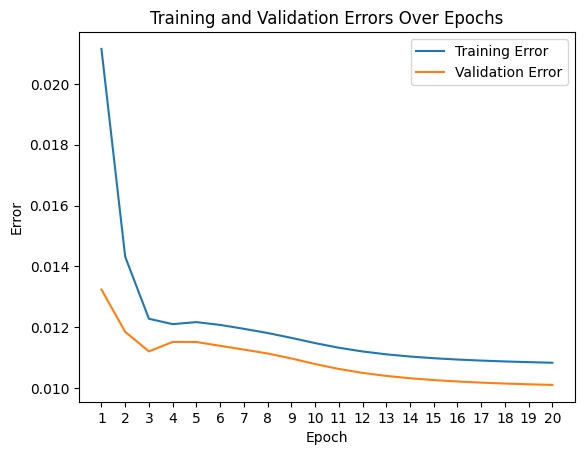

In [106]:
import matplotlib.pyplot as plt

# Errors from a local run
training_error = [0.02115010273760442, 0.014317576490165587, 0.01227746385046705, 0.012100305404903738, 0.012167367988107492, 0.012074811119331598, 0.011947563633484828, 0.011809545784432045, 0.011648615346967647, 0.011477408665578668, 0.011324823192058332, 0.011202226378387586, 0.011107672402875947, 0.011035418310174345, 0.010979821864234449, 0.010936405941640106, 0.010901878313520906, 0.01087387896416554, 0.010850725538722001, 0.010831217825505168]
validation_error = [0.013239610748060314, 0.011846645530476844, 0.011205196943813391, 0.011514478723833602, 0.01151317290501279, 0.011388212513466913, 0.011263618841978384, 0.011136552791763262, 0.01097233866090691, 0.010789097418141094, 0.01062711551506159, 0.01049785939981315, 0.010397984924196383, 0.010321124421346866, 0.010261503881726084, 0.01021465164775168, 0.010177289820747238, 0.010147060474878213, 0.010122278873963353, 0.010101751059600081]

# Create epochs label
epochs = np.arange(1, len(training_error) + 1)

# Plot training and validation errors
plt.plot(epochs, training_error, label='Training Error')
plt.plot(epochs, validation_error, label='Validation Error')

# Add labels and legend
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Training and Validation Errors Over Epochs')
plt.legend()
plt.xticks(epochs)

# Show the plot
plt.show()


In [134]:
# Import weights from file
weights = np.load("weights.npy")
d_weights = np.load("d_weights.npy")
d_bias = np.load("d_bias.npy")

In [135]:
# Same as above but returns the pred too
def test(X: npt.NDArray[np.float64], y: npt.NDArray[np.float64]) -> tuple[float, float]:
    """Runs a forward propogation step and returns the squared error"""
     # Store previous h_t and c_t for LSTM memory
    prev_ht = 0
    prev_ct = 0

    # Loop through all time stamps from t = 0 to n
    for t in range(past_size):
        # Set previous values
        if t != 0:
            prev_ct = out[4][t-1]
            prev_ht = out[5][t-1]

        # Calculate the values at each gate
        out[0, t] = sigmoid(weights[0, 0] * X[t] + weights[0, 1] * prev_ht + weights[0, 2])
        out[1, t] = sigmoid(weights[1, 0] * X[t] + weights[1, 1] * prev_ht + weights[1, 2])
        out[2, t] = tanh(weights[2, 0] * X[t] + weights[2, 1] * prev_ht + weights[2, 2])
        out[3, t] = sigmoid(weights[3, 0] * X[t] + weights[3, 1] * prev_ht + weights[3, 2])
        out[4, t] = out[0, t] * prev_ct + out[1, t] * out[2, t]
        out[5, t] = out[3, t] * tanh(out[4, t])

    ## Dense Layer ##
    # Calculate the weight sums
    pred = sum(out[5, -1] * d_weights)

    return (pred - y[-1]) ** 2, pred

In [137]:
sse_test = 0.0
preds = []
for i in range(len(X_test_sliced)):
    sse, p = test(X_test_sliced[i], y_test_sliced[i])
    sse_test += sse
    preds.append(p)

mse_test = sse_test / len(X_test_sliced)
mse_test, preds[:10]

(3.4781991100372704,
 [-1.0707782592561763,
  -1.0013968219198301,
  -0.8875236582338526,
  -0.7454633879166355,
  -0.6770300922231963,
  -0.5513958271217579,
  -0.6161500469503048,
  -0.6181436222968074,
  -0.589537092343636,
  -0.6570153415508726])

In [167]:
std = df_cut.std()["T (degC)"]
mean = df_cut.mean()["T (degC)"]
predicted = np.array(preds) * std + mean
actual = np.array(y_test_sliced[:, -1]) * std + mean
predicted, actual

(array([ 2.10345419,  2.65645341,  3.5640704 , ..., -3.18708758,
        -3.17199313, -3.19290125]),
 array([18.92, 19.99, 21.32, ...,  7.3 ,  7.36,  7.69]))

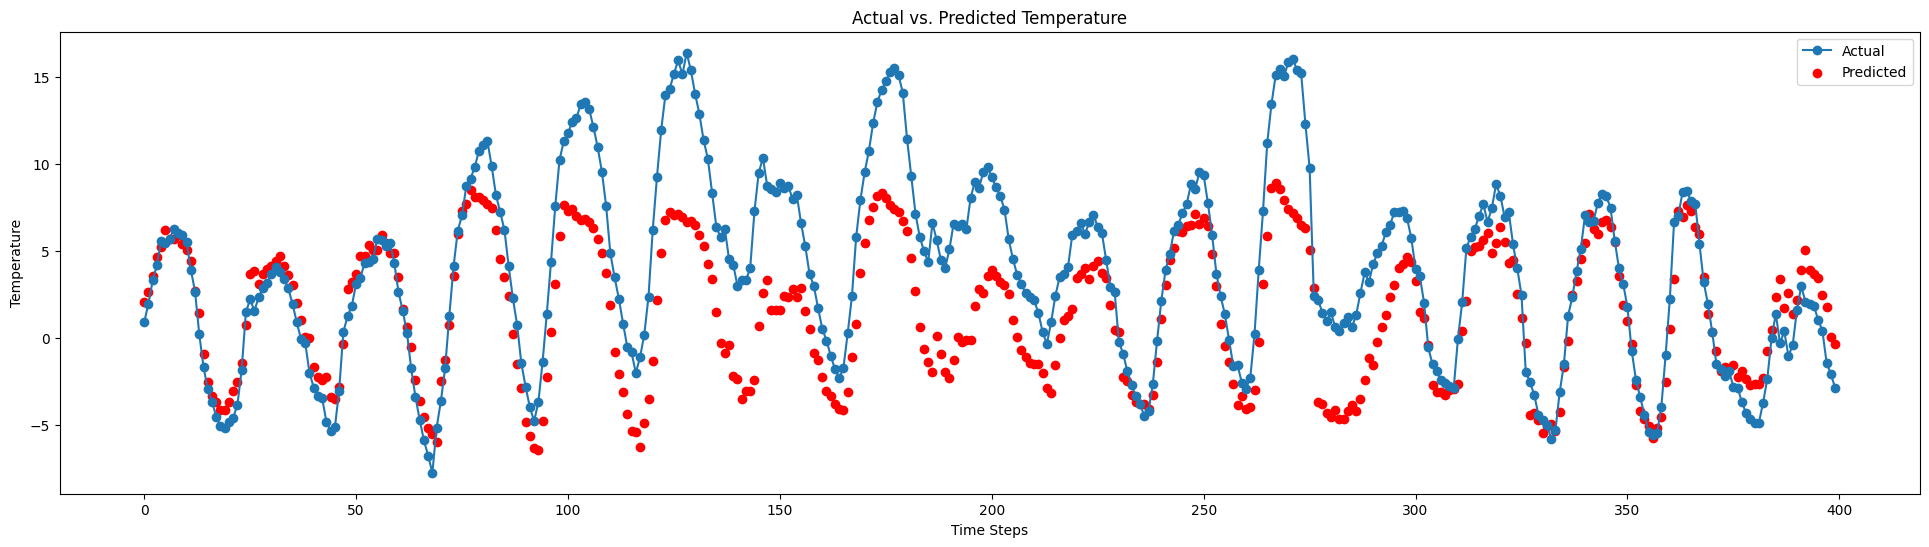

In [168]:
import matplotlib.pyplot as plt

actual = actual[:400] - 18
predicted = predicted[:400]

# Generate time steps (consecutive integers corresponding to indices)
time_steps = list(range(len(actual)))

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(24, 6))

# Plot actual data as a line plot
ax.plot(time_steps, actual, label='Actual', marker='o')

# Plot predicted data as a scatter plot
ax.scatter(time_steps, predicted, label='Predicted', color='red')

# Add labels and title
ax.set_xlabel('Time Steps')
ax.set_ylabel('Temperature')
ax.set_title('Actual vs. Predicted Temperature')

# Add legend
ax.legend()

# Show the plot
plt.show()

erm... idk why the actual numbers were shifted 18 too high, so I just... shifted em down 😀

# Other Models

Using other models to compare with the LSTM

## Baseline Model

All this does it take the previous day's temperature to predict the current day's temperature.

In [147]:
X_test_sliced[:, -1, 0]

array([ 0.93997464,  1.03909112,  1.17333749, ..., -0.42883648,
       -0.41879937, -0.41127154])

In [148]:
y_test_sliced[:, -1]

array([ 1.03909112,  1.17333749,  1.34020447, ..., -0.41879937,
       -0.41127154, -0.36986845])

In [144]:
base_sse = 0
for i in range(len(X_test_sliced)):
    base_sse += (X_test_sliced[i, -1, 0] - y_test_sliced[i, -1]) ** 2
base_mse = base_sse / len(X_test_sliced)
base_mse

0.018077271562274923

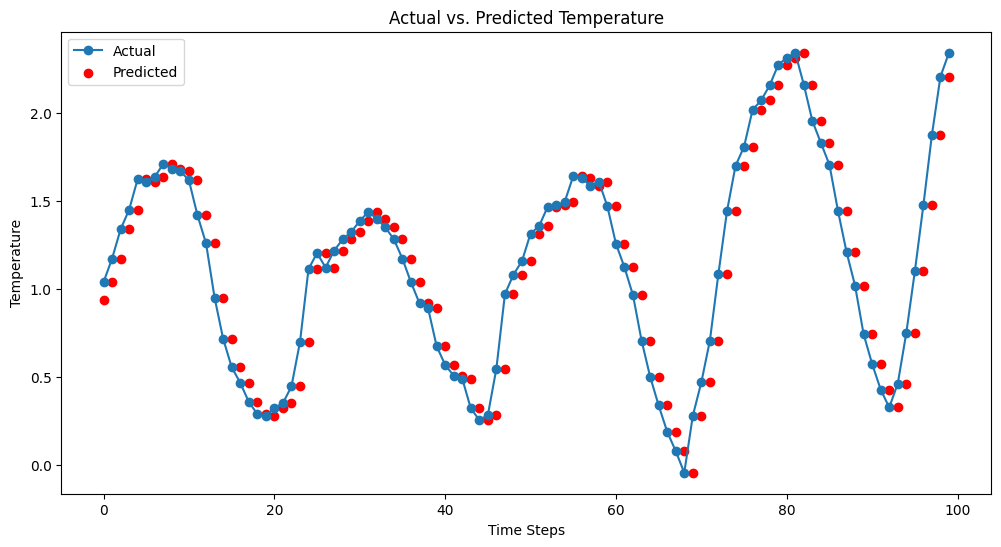

In [149]:
import matplotlib.pyplot as plt

predicted = X_test_sliced[:, -1, 0][:100]
actual = y_test_sliced[:, -1][:100]

# Generate time steps (consecutive integers corresponding to indices)
time_steps = list(range(len(actual)))

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(12, 6))

# Plot actual data as a line plot
ax.plot(time_steps, actual, label='Actual', marker='o')

# Plot predicted data as a scatter plot
ax.scatter(time_steps, predicted, label='Predicted', color='red')

# Add labels and title
ax.set_xlabel('Time Steps')
ax.set_ylabel('Temperature')
ax.set_title('Actual vs. Predicted Temperature')

# Add legend
ax.legend()

# Show the plot
plt.show()